# Investment Banking Stock Vs. Fed Funds Rate

In [284]:
# Initial Libraries Used 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import yfinance as yf
import datetime
%matplotlib inline

## Project Description

This project will look into 1Y market data from the following Investment Banking Corporations.

- JPMorgan Chase
- Bank of America
- Wells Fargo
- Citi Group
- US Bancorp

With this data that was imported from https://finance.yahoo.com/. The goal is to be able to predict whether a stock will rise or fall daily based off of historical data. Even with a little edge there is still room to make money and can help make a buying decision for a certain day. This will be most beneficial for "Day Trading" but will still be able to help predict a future result given theorhetical circumstances and projections. The Federal Funds Effective rate data pulled from https://www.newyorkfed.org/markets/reference-rates/effr will be added to each market dataset and will be used as a predictor to help explain the rise or fall.

## Data Loading, Summarization & Early Vizualizations

### FED Funds Data

In [304]:
fedfunds = pd.read_csv("FEDFUNDS.csv") # Initial Readin
fedfunds['DATE'] = pd.to_datetime(fedfunds['DATE'],infer_datetime_format=True)# Converting Date column to pandas datetime
fedfunds.head() # Summary of first six lines of the data

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [305]:
fedfunds.describe() # Quick Summary of the Data
print(fedfunds.dtypes) # Checking data Objects

DATE        datetime64[ns]
FEDFUNDS           float64
dtype: object


In [306]:
print(' There are',len(fedfunds),'rows of data.\n',
     'They dates range from',fedfunds['DATE'][0].date(),'to',fedfunds['DATE'][len(fedfunds)-1].date(),'monthly.')

 There are 824 rows of data.
 They dates range from 1954-07-01 to 2023-02-01 monthly.


In [307]:
#Getting column for just years
fedfunds['year'] = fedfunds['DATE'].dt.year # Adding new column to just show year for plotting long term purposes
fedfunds.head() # Display

,DATE,FEDFUNDS,year
0,1954-07-01,0.80,1954
1,1954-08-01,1.22,1954
2,1954-09-01,1.07,1954
3,1954-10-01,0.85,1954
4,1954-11-01,0.83,1954


Text(0.5, 1.0, 'All Time Federal Funds Rate')

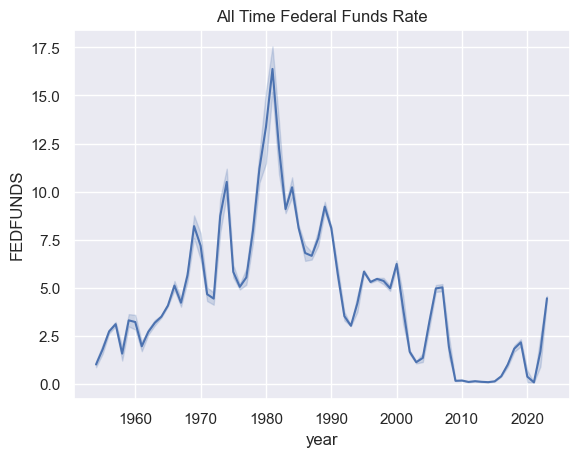

In [289]:
sns.set_theme(style='dark') # Theme
sns.lineplot(x=fedfunds['year'],y=fedfunds['FEDFUNDS']) # Plotting object
plt.grid()
plt.title("All Time Federal Funds Rate")

### Investment Banking Market Data

In [290]:
# Reading in all of the bank data
jp = pd.read_csv("JPC_historical.csv") # JPMorgan
c = pd.read_csv("C_historical.csv") # Citi Group
wfc = pd.read_csv("wfc_historical.csv") #  Wells Fargo
bac = pd.read_csv("BAC_historical.csv") # Bank of America
usb = pd.read_csv("USB_historical.csv") # US Bancorp

Converting "Date" Column to Pandas Datetime variable type.

In [292]:
# Banks
c['Date'] = pd.to_datetime(c['Date'])
wfc['Date'] = pd.to_datetime(wfc['Date'])
bac['Date'] = pd.to_datetime(bac['Date'])
usb['Date'] = pd.to_datetime(usb['Date'])
jp['Date'] = pd.to_datetime(jp['Date'])
 # Checking the Data Types
jp.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

This code is getting rid of the "$" that has been added to monetary values in the data.

In [293]:
# JPMorgan
jp[jp.columns[1]] = jp[jp.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
jp[jp.columns[3:]] = jp[jp.columns[3:]].replace('[\$,]', '', regex=True).astype(float) # Remaining Columns Conversion
# Wells Fargo
wfc[wfc.columns[1]] = wfc[wfc.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
wfc[wfc.columns[3:]] = wfc[wfc.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
# Citi Bank
c[c.columns[1]] = c[c.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
c[c.columns[3:]] = c[c.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
# Bank of America
bac[bac.columns[1]] = bac[bac.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
bac[bac.columns[3:]] = bac[bac.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
# U.S. Bancorp
usb[usb.columns[1]] = usb[usb.columns[1]].replace('[\$,]', '', regex=True).astype(float) # Converting Columns to usable numbers
usb[usb.columns[3:]] = usb[usb.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [294]:
jp.dtypes # Rechecking the columns

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

## Early Analysis

#### JP MORGAN CHASE

In [11]:
round(jp.describe(),2)

,Close/Last,Volume,Open,High,Low
count,250.00,250.00,250.00,250.00,250.00
mean,125.94,12332838.00,125.87,127.26,124.46
std,10.82,4388299.12,10.71,10.65,10.81
min,101.96,3220496.00,101.80,104.54,101.28
25%,115.82,9311279.00,116.00,117.30,114.66
50%,127.15,11511325.00,126.68,128.29,125.75
75%,135.07,14263320.00,134.77,135.72,133.50
max,143.80,33420140.00,143.35,144.34,142.28


The JP Morgan stock data includes $250$ data points, with a mean closing price of $125.94$ and a standard deviation of $10.82$. The stock's lowest value during this period was $101.96$, while its highest value was $143.80$. The average volume of trading was around $12.3$ million shares, with a minimum of $3.2$ million shares and a maximum of $33.4$ million shares. The data shows that the stock's price has fluctuated within a range of $101.28$ to $144.34$, and that it has been traded at a relatively high volume.

#### BANK OF AMERICA

In [12]:
round(bac.describe(),2)

,Close/Last,Volume,Open,High,Low
count,250.00,2.500000e+02,250.00,250.00,250.00
mean,35.21,4.314670e+07,35.23,35.66,34.78
std,2.99,1.424952e+07,3.05,3.04,2.99
min,29.77,1.611850e+07,29.41,30.22,29.31
25%,33.16,3.304278e+07,33.28,33.67,32.86
50%,34.76,4.048539e+07,34.75,35.21,34.28
75%,36.66,4.934548e+07,36.74,37.11,36.17
max,44.18,1.097790e+08,44.25,44.63,43.70


The Bank of America stock data shows that the stock was traded at an average closing price of $35.21$ over the course of $250$ data points, with a standard deviation of $2.99$. The average volume of trading during this period was around $43$ million shares, with a minimum of $16$ million shares and a maximum of $110$ million shares. The data suggests that the stock's price has fluctuated between a range of $29.77$ to $44.18$, with the majority of the trading volume concentrated around the median value of $34.76$. The stock's high trading volume indicates that it has been a popular choice among investors, and the relatively tight standard deviation suggests that the stock has been relatively stable.

#### WELLS FARGO

In [13]:
round(wfc.describe(),2)

,Close/Last,Volume,Open,High,Low
count,250.00,250.00,250.00,250.00,250.00
mean,44.52,20508085.84,44.51,45.09,43.92
std,3.10,8698689.21,3.15,3.12,3.12
min,37.43,4913253.00,37.36,37.73,36.54
25%,42.52,14868847.50,42.54,43.06,42.10
50%,44.32,18614255.00,44.34,44.90,43.59
75%,46.73,24085150.00,46.67,47.08,46.14
max,53.39,65583240.00,53.06,54.20,52.30


The Wells Fargo stock data shows that the stock had an average closing price of $49.21$ over the course of $250$ data points, with a standard deviation of $3.62$. The average volume of trading during this period was around $20.3$ million shares, with a minimum of 6.8 million shares and a maximum of $86.6$ million shares. The data suggests that the stock's price has fluctuated between a range of $40.45$ to $57.50$, with the majority of the trading volume concentrated around the median value of $49.68$. The relatively tight standard deviation indicates that the stock has been relatively stable, and the trading volume suggests that it has been a popular choice among investors. Overall, the data suggests that the Wells Fargo stock has performed consistently with relatively low volatility.

#### CITIGROUP

In [14]:
round(c.describe(),2)

,Close/Last,Volume,Open,High,Low
count,250.00,250.00,250.00,250.00,250.00
mean,49.21,20328642.74,49.20,49.83,48.57
std,3.62,7924687.74,3.64,3.64,3.62
min,40.45,6823564.00,40.20,41.36,40.01
25%,46.34,15256560.00,46.52,47.02,45.60
50%,49.68,19092890.00,49.72,50.26,48.86
75%,51.80,23640307.50,51.53,52.25,51.09
max,57.50,86566230.00,57.83,58.25,57.31


The table shows the summary of CITIGROUP's stock data, including the closing price, volume, open price, high, and low prices for a period of $250$ days. The average closing price is $49.21$, with a standard deviation of $3.62$, indicating that the stock's price has relatively low volatility. The minimum closing price was $40.45$, and the maximum was $57.50$. The trading volume also shows a wide range of variability, with an average of $20.3$ million shares traded per day, with a standard deviation of $7.9$ million shares. The table provides investors with useful information to make informed decisions about buying, selling, or holding CITIGROUP's stock.

#### U.S. BANCORP

In [15]:
round(usb.describe(),2)

,Close/Last,Volume,Open,High,Low
count,250.00,250.00,250.00,250.00,250.00
mean,47.23,8171047.56,47.26,47.77,46.69
std,3.91,3248609.43,3.97,3.97,3.90
min,38.79,2564603.00,38.59,39.48,38.39
25%,44.19,5946521.00,44.24,44.70,43.76
50%,47.11,7560470.50,47.14,47.69,46.65
75%,49.24,9457515.25,49.26,49.78,48.65
max,57.12,21456460.00,57.70,57.92,56.76


The US Bancorp stock data table shows that the mean stock price for the past $250$ days was $47.23$ with a standard deviation of $3.91$. The lowest stock price during the period was $38.79$ and the highest was $57.12$. The trading volume during the period ranged from $2.5$ million to $21.5$ million shares, with an average trading volume of $8.17$ million shares. The table also shows that the stock generally opened at a slightly higher price than it closed, with an average opening price of $47.26$ and an average closing price of $47.23$. The stock reached its highest point during the period at $57.92$ and its lowest point at $38.39$.

### Vizualization

<Figure size 640x480 with 0 Axes>

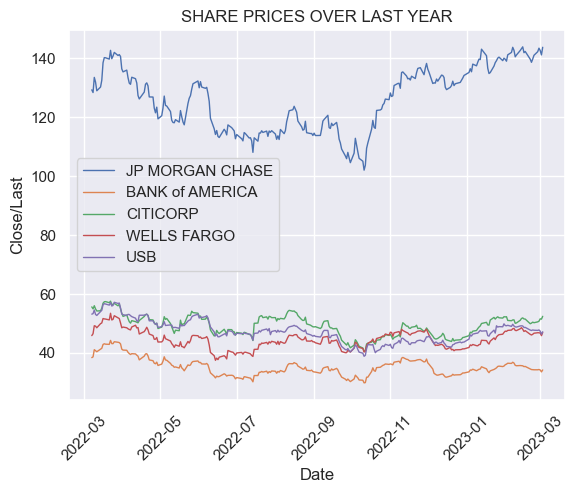

<Figure size 640x480 with 0 Axes>

In [295]:
sns.set_theme(style='dark')
#JP MORGAN
sns.lineplot(x ='Date',y = 'Close/Last',data=jp,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=bac,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=c,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=wfc,lw=1)
sns.lineplot(x ='Date',y = 'Close/Last',data=usb,lw=1)
plt.title('SHARE PRICES OVER LAST YEAR')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['JP MORGAN CHASE','BANK of AMERICA','CITICORP','WELLS FARGO','USB'])
plt.figure()

## Data Preprocessing

In [296]:
# Getting Last Twelve Months from the FEDFUNDS dataset
ff1y = pd.DataFrame(fedfunds[-12:]).reset_index()
ff1y['month'] = ff1y['DATE'].dt.strftime("%Y-%m")
# Adding new column representing months to add the FFR to the JP dataset
jp['month'] = jp['Date'].dt.strftime("%Y-%m")
bac['month'] = bac['Date'].dt.strftime("%Y-%m")
wfc['month'] = wfc['Date'].dt.strftime("%Y-%m")
c['month'] = c['Date'].dt.strftime("%Y-%m")
usb['month'] = usb['Date'].dt.strftime("%Y-%m")

In [297]:
jp.head() # New column "month" is added

,Date,Close/Last,Volume,Open,High,Low,month
0,2023-03-03,143.66,9513063,141.51,143.7400,141.0800,2023-03
1,2023-03-02,141.07,11107550,142.24,142.4300,139.5400,2023-03
2,2023-03-01,142.55,7139155,142.10,143.4583,141.8000,2023-03
3,2023-02-28,143.35,11019760,142.94,143.7600,141.9001,2023-02
4,2023-02-27,142.16,10014650,142.11,143.3100,141.7201,2023-02


In [298]:
ff1y = ff1y.drop('index',axis=1) # dropping original index
ff1y.head() # Displaying new index

,DATE,FEDFUNDS,year,month
0,2022-03-01,0.20,2022,2022-03
1,2022-04-01,0.33,2022,2022-04
2,2022-05-01,0.77,2022,2022-05
3,2022-06-01,1.21,2022,2022-06
4,2022-07-01,1.68,2022,2022-07


In [299]:
# Now there is a indexing key to map the FFRs from the past year without manual entry
jp['month'][len(jp)-1] == ff1y['month'][0] 

True

In [300]:
def dict_map_maker(map_df):
    demo = map_df.iloc[:,[1,3]]
    ffr_dict = {}
    for i in range(len(demo)):
        ffr_dict[demo['month'][i]] = demo['FEDFUNDS'][i]
    #print(ffr_dict)
    return ffr_dict

def mapping_ffr(df,map_df):
    map_df_dict = dict_map_maker(map_df)
    df['FFR'] = df['month'].map(map_df_dict)
    return df,map_df_dict

In [301]:
jp_analysis, ffr_dict = mapping_ffr(jp,ff1y)
bac_analysis, _ = mapping_ffr(bac,ff1y)
wfc_analysis, _  = mapping_ffr(wfc,ff1y)
c_analysis, _ = mapping_ffr(c,ff1y)
usb_analysis, _ = mapping_ffr(usb,ff1y)

In [302]:
last_rate = ffr_dict[list(ffr_dict.keys())[len(ffr_dict)-1]]
print(last_rate)

# Filling in the Na value incase rate for new month hasn't come out yet
jp_analysis['FFR'] = jp_analysis['FFR'].fillna(last_rate)
bac_analysis['FFR'] = bac_analysis['FFR'].fillna(last_rate)
wfc_analysis['FFR'] = wfc_analysis['FFR'].fillna(last_rate)
c_analysis['FFR'] = c_analysis['FFR'].fillna(last_rate)
usb_analysis['FFR'] = usb_analysis['FFR'].fillna(last_rate)
# Filling in the Na value incase rate for new month hasn't come out yet
jp_analysis

4.57


,Date,Close/Last,Volume,Open,High,Low,month,FFR
0,2023-03-03,143.66,9513063,141.510,143.7400,141.0800,2023-03,4.57
1,2023-03-02,141.07,11107550,142.240,142.4300,139.5400,2023-03,4.57
2,2023-03-01,142.55,7139155,142.100,143.4583,141.8000,2023-03,4.57
3,2023-02-28,143.35,11019760,142.940,143.7600,141.9001,2023-02,4.57
4,2023-02-27,142.16,10014650,142.110,143.3100,141.7201,2023-02,4.57
...,...,...,...,...,...,...,...,...
245,2022-03-11,128.89,20061790,132.485,134.0800,128.4249,2022-03,0.20
246,2022-03-10,131.86,15604250,131.860,133.4500,130.3250,2022-03,0.20
247,2022-03-09,133.44,17536200,132.900,135.2400,132.4400,2022-03,0.20
248,2022-03-08,128.30,19207820,129.640,131.7900,127.2700,2022-03,0.20


The federal funds rate has been matched to all of the correct dates for each data set which can make it a feature to be used for prediction.

### Analyzing Fed Fund Rates

In [309]:
fedfunds[-12:]

,DATE,FEDFUNDS,year
812,2022-03-01,0.20,2022
813,2022-04-01,0.33,2022
814,2022-05-01,0.77,2022
815,2022-06-01,1.21,2022
816,2022-07-01,1.68,2022
817,2022-08-01,2.33,2022
818,2022-09-01,2.56,2022
819,2022-10-01,3.08,2022
820,2022-11-01,3.78,2022
821,2022-12-01,4.10,2022


In [24]:
jp_analysis['FFR'].describe()

count    250.000000
mean       2.440920
std        1.502711
min        0.200000
25%        1.210000
50%        2.560000
75%        4.020000
max        4.570000
Name: FFR, dtype: float64

The federal funds rate is a key monetary policy tool used by the Federal Reserve to control inflation and stabilize the economy. Over the past year, the mean federal funds rate was 2.44%, with a standard deviation of 1.50%. The minimum rate was 0.20%, while the maximum was 4.57%. Looking at the more recent data, the federal funds rate has increased gradually over the past several months, reaching 4.57% in February 2023, which is the highest it has been in the past year. This may indicate that the Federal Reserve is concerned about rising inflation and is taking steps to counteract it by raising the interest rates.

### Plot Vizualizations

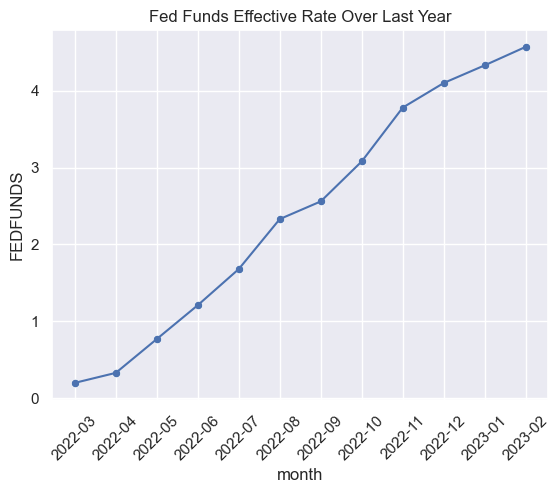

In [310]:
sns.lineplot(x= 'month',y='FEDFUNDS',data=ff1y)
sns.scatterplot(x= 'month',y='FEDFUNDS',data=ff1y)
plt.grid()
plt.title('Fed Funds Effective Rate Over Last Year')
plt.xticks(rotation=45)
plt.show()

In [311]:
mask = fedfunds['year'] > 2019
nffr = fedfunds[mask]
nffr = nffr.reset_index()
nffr = nffr.drop(['index'],axis=1)
nffr['month'] = nffr['DATE'].dt.strftime("%Y-%m")

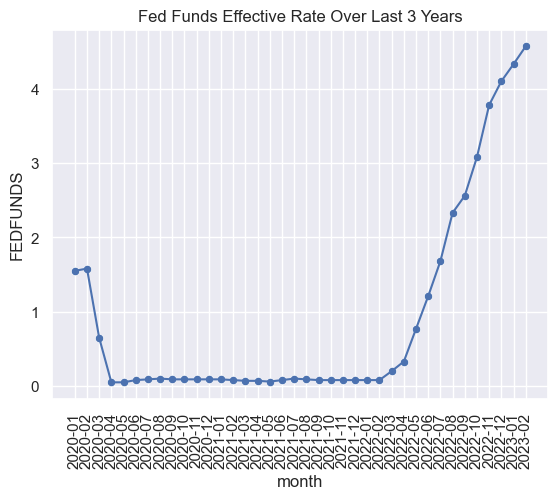

In [312]:
sns.lineplot(x='month',y='FEDFUNDS',data=nffr)
sns.scatterplot(x= 'month',y='FEDFUNDS',data=nffr)
plt.grid()
plt.title('Fed Funds Effective Rate Over Last 3 Years')
plt.xticks(rotation=90)
plt.show()

## Modelling & Prediction

In [313]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [314]:
def adding_high_low_class(df):
    df['up/down'] = np.where(df['Close/Last']> df['Open'],1,0)
    return df

In [315]:
# Adding classification col for if the stock was higher or lower for the day
jp_analysis = adding_high_low_class(jp_analysis)
bac_analysis = adding_high_low_class(bac_analysis)
wfc_analysis = adding_high_low_class(wfc_analysis)
c_analysis = adding_high_low_class(c_analysis)
usb_analysis = adding_high_low_class(usb_analysis)
temp = jp_analysis
#temp.shift(0)

### Model Functions

In [316]:
def stock_prediction_dt(data, curr_open=0,volume_curr=0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy',
                                                                                               max_depth=10))]) 
    # Decision Tree Classifier
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("Decision Tree Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf

def stock_prediction_lr(data, curr_open=0,volume_curr = 0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('Logistic Regression', LogisticRegression())]) # Logistic Regression
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("Logistic Regression Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf

def stock_prediction_GPC(data, curr_open=0,volume_curr = 0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('GPC', GaussianProcessClassifier())]) # GPC
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("GPC Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf

def stock_prediction_P(data, curr_open=0,volume_curr = 0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('Perceptron', SGDClassifier(loss="perceptron"
                                                                                        , eta0=1, learning_rate="constant"
                                                                                        , penalty=None))]) # Perceptron
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("Perceptron Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf

def stock_prediction_SGD(data, curr_open=0,volume_curr = 0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('SGDClassifier', SGDClassifier())]) # Stochiatic Gradient Decent
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("SGD Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf

def stock_prediction_LSVC(data, curr_open=0,volume_curr = 0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('LinearSVC', LinearSVC())]) # LinearSVC
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("Linear SVC Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf

def stock_prediction_lm(data, curr_open=0,volume_curr = 0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('Linear Regression', LinearRegression())]) # Linear Regression
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("Linear Regression Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf

def stock_prediction_MLP(data, curr_open=0,volume_curr = 0, today_high=0, today_low=0, curr_ffr=0):
    #Only Use Current if you want to predict current
    
    #Spliting into Training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(data.drop(['up/down','Close/Last','Date','month'],axis=1)
    , data['up/down'], test_size=0.30, random_state=42)
    
    # Pipeline
    clf = Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier())]) # Neural Network
    
    # Fitting the training data to the testing data
    clf.fit(X_train, y_train)
    
    # Printing Accuracy of training set
    print("MLP Testing Accuracy:",clf.score(X_test,y_test)*100)
    
    # If todays data was given will put it into format that can be predicted 
    today=pd.DataFrame(np.array([volume_curr,curr_open,today_high,today_low,curr_ffr]).reshape(-1,1))
    if curr_open != 0:
        if clf.predict(today.T)[0] == 1:
            print("Based off of given data from today the stock will close above opening")
        else:
            print("Based off of given data from today the stock will close below opening")
            
    return clf,X_train,y_test

#### JPMorgan Chase Stock Prediction Models & Accuracy

In [322]:
#np.random.seed(2)
jp_clf_mlp = stock_prediction_MLP(jp_analysis) # Multilayer Perceptron
jp_clf_lr = stock_prediction_lr(jp_analysis) # Logistic Regression
jp_clf_lm = stock_prediction_lm(jp_analysis) # Linear Regression
jp_clf_dt = stock_prediction_dt(jp_analysis) # Decision Tree
jp_clf_p = stock_prediction_P(jp_analysis) # Perceptron
jp_clf_gpc = stock_prediction_GPC(jp_analysis) # Gaussian Proccess Classifier
jp_clf_sgd = stock_prediction_SGD(jp_analysis) # Stochiatic Gradient Decent
jp_clf_LSVC = stock_prediction_LSVC(jp_analysis) # LSVC

MLP Testing Accuracy: 62.66666666666667
Logistic Regression Testing Accuracy: 68.0
Linear Regression Testing Accuracy: 45.68051506821503
Decision Tree Testing Accuracy: 65.33333333333333
Perceptron Testing Accuracy: 60.0
GPC Testing Accuracy: 57.333333333333336
SGD Testing Accuracy: 78.66666666666666
Linear SVC Testing Accuracy: 82.66666666666667


C:\Users\jrdan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Bank of America Corporation Stock Prediction Models & Accuracy

In [318]:
#np.random.seed(123)
bac_clf_mlp = stock_prediction_MLP(bac_analysis) # Multilayer Perceptron
bac_clf_lr = stock_prediction_lr(bac_analysis) # Logistic Regression
bac_clf_lm = stock_prediction_lm(bac_analysis) # Linear Regression
bac_clf_dt = stock_prediction_dt(bac_analysis) # Decision Tree
bac_clf_p = stock_prediction_P(bac_analysis) # Perceptron
bac_clf_gpc = stock_prediction_GPC(bac_analysis) # Gaussian Proccess Classifier
bac_clf_sgd = stock_prediction_SGD(bac_analysis) # Stochiatic Gradient Decent
bac_clf_LSVC = stock_prediction_LSVC(bac_analysis) # LSVC

MLP Testing Accuracy: 69.33333333333334
Logistic Regression Testing Accuracy: 80.0
Linear Regression Testing Accuracy: 44.8899613644419
Decision Tree Testing Accuracy: 58.666666666666664
Perceptron Testing Accuracy: 70.66666666666667
GPC Testing Accuracy: 57.333333333333336
SGD Testing Accuracy: 74.66666666666667
Linear SVC Testing Accuracy: 82.66666666666667


C:\Users\jrdan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jrdan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Wells Fargo Corporation Stock Prediction Models & Accuracy

In [319]:
#np.random.seed(4)
wfc_clf_mlp = stock_prediction_MLP(wfc_analysis) # Multilayer Perceptron
wfc_clf_lr = stock_prediction_lr(wfc_analysis) # Logistic Regression
wfc_clf_lm = stock_prediction_lm(wfc_analysis) # Linear Regression
wfc_clf_dt = stock_prediction_dt(wfc_analysis) # Decision Tree
wfc_clf_p = stock_prediction_P(wfc_analysis) # Perceptron
wfc_clf_gpc = stock_prediction_GPC(wfc_analysis) # Gaussian Proccess Classifier
wfc_clf_sgd = stock_prediction_SGD(wfc_analysis) # Stochiatic Gradient Decent
wfc_clf_LSVC = stock_prediction_LSVC(wfc_analysis) # LSVC

MLP Testing Accuracy: 80.0
Logistic Regression Testing Accuracy: 78.66666666666666
Linear Regression Testing Accuracy: 40.804234326030354
Decision Tree Testing Accuracy: 65.33333333333333
Perceptron Testing Accuracy: 61.33333333333333
GPC Testing Accuracy: 53.333333333333336
SGD Testing Accuracy: 77.33333333333333
Linear SVC Testing Accuracy: 82.66666666666667


C:\Users\jrdan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Citigroup Inc Stock Prediction Models & Accuracy

In [320]:
#np.random.seed(234)
c_clf_mlp = stock_prediction_MLP(c_analysis) # Multilayer Perceptron
c_clf_lr = stock_prediction_lr(c_analysis) # Logistic Regression
c_clf_lm = stock_prediction_lm(c_analysis) # Linear Regression
c_clf_dt = stock_prediction_dt(c_analysis) # Decision Tree
c_clf_p = stock_prediction_P(c_analysis) # Perceptron
c_clf_gpc = stock_prediction_GPC(c_analysis) # Gaussian Proccess Classifier
c_clf_sgd = stock_prediction_SGD(c_analysis) # Stochiatic Gradient Decent
c_clf_LSVC = stock_prediction_LSVC(c_analysis) # LSVC

MLP Testing Accuracy: 72.0
Logistic Regression Testing Accuracy: 74.66666666666667
Linear Regression Testing Accuracy: 53.29637082764358
Decision Tree Testing Accuracy: 53.333333333333336
Perceptron Testing Accuracy: 73.33333333333333
GPC Testing Accuracy: 60.0
SGD Testing Accuracy: 66.66666666666666
Linear SVC Testing Accuracy: 88.0


C:\Users\jrdan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### US Bancorp Stock Prediction Models & Accuracy

In [321]:
#np.random.seed(3)
usb_clf_mlp = stock_prediction_MLP(usb_analysis) # Multilayer Perceptron
usb_clf_lr = stock_prediction_lr(usb_analysis) # Logistic Regression
usb_clf_lm = stock_prediction_lm(usb_analysis) # Linear Regression
usb_clf_dt = stock_prediction_dt(usb_analysis) # Decision Tree
usb_clf_p = stock_prediction_P(usb_analysis) # Perceptron
usb_clf_gpc = stock_prediction_GPC(usb_analysis) # Gaussian Proccess Classifier
usb_clf_sgd = stock_prediction_SGD(usb_analysis) # Stochiatic Gradient Decent
usb_clf_LSVC = stock_prediction_LSVC(usb_analysis) # LSVC

MLP Testing Accuracy: 68.0
Logistic Regression Testing Accuracy: 76.0
Linear Regression Testing Accuracy: 33.71384107308815
Decision Tree Testing Accuracy: 57.333333333333336
Perceptron Testing Accuracy: 70.66666666666667
GPC Testing Accuracy: 56.00000000000001
SGD Testing Accuracy: 73.33333333333333
Linear SVC Testing Accuracy: 81.33333333333333


C:\Users\jrdan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Results